# Knn Classifier

In [3]:
#importing all libraries
import numpy as ny
import pandas as pa
import sklearn.datasets
import seaborn as sb
%matplotlib inline
import matplotlib.pyplot as pt
from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [4]:
#loading of data
func = load_iris()

1. Train the model on 60% of data set
2. split the entire data set in 20% test, 20% validation and 60% train sets

In [5]:
#Splitting of data into train, val and test
x= func.data
y= func.target
X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state=42, test_size=0.2)
A_train, A_val, B_train, B_val = train_test_split(X_train, Y_train, random_state=42, test_size=0.25)

1. Splitting the data into 80% of train and 20% test data
2. Train data is further splitted into 60% of train and 20% validation data

In [6]:
#Training the model on train data
Knc=KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
#Fitting the classifier to data
Knc.fit(A_train,B_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [7]:
#Testing the model on test data
test = Knc.predict(X_test)

In [8]:
#Accuracy of model on test data
acc = Knc.score(X_test, Y_test)
print('Accuracy of model on test data:',acc)

Accuracy of model on test data: 0.9666666666666667


1. Consider a value of k from k_value set
2. Train the model on 60% of train data
3. Test the model on 20% of validation data for finding best value of K from the given set of K values
4. For each value of K the model gives the accuracy scores
5. All the values of K and accuracies are stored in data frame and printed as below.

In [9]:
#Finding best value of K
k_value = [1,5,10,15,20,25,30,35]
result_list = []
for k in k_value:
    n=KNeighborsClassifier(n_neighbors=k)
    n.fit(A_train, B_train)
    y=n.predict(A_val)
    result = metrics.accuracy_score(B_val,y)
    result_list.append(metrics.accuracy_score(B_val,y))
df= pa.DataFrame(result_list,k_value,columns = ['Accuracy scores'])
df

,Accuracy scores
1,0.900000
5,0.933333
10,0.933333
15,0.933333
20,0.933333
25,0.966667
30,0.966667
35,0.933333


1.The validation set is used for selecting the model complexity.

2.Evaluating the performance on the validation set, and pick the best value of k.

Text(0, 0.5, 'Accuracy')

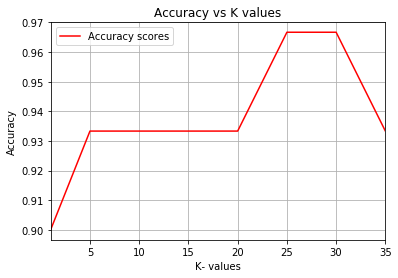

In [10]:
#Plotting graph for above tabular data
df.plot(color='red')
pt.grid()
pt.title('Accuracy vs K values')
pt.xlabel('K- values')
pt.ylabel('Accuracy')


In [13]:
k_value = [25,30]
result_list = []
for k in k_value:
    n=KNeighborsClassifier(n_neighbors=k)
    n.fit(A_train, B_train)
    y=n.predict(X_test)
    result=(metrics.accuracy_score(Y_test, y))
    result_list.append(metrics.accuracy_score(Y_test, y))
df= pa.DataFrame(result_list,k_value,columns = ['Accuracy score on test data'])
df


,Accuracy score on test data
25,1.0
30,1.0


For values of k=25 and k=30 maximum accuracies are obtained:
1. For value of k= 25 the speed of convergence is high, low vaiance and high bias
2. As the value of K increases the error rate on training set also increases
3. K value should be a odd number and the genearalization error which is expected value of misclassification rate, where the model is simple and is underfit